In [392]:
import tensorflow as tf  # ML 백엔드로 사용
from keras.models import Sequential  # ML 프론트엔드로 사용
from keras.layers import Dense
import pandas as pd  # csv 파일 불러오기에 사용
import numpy as np  # TF는 numpy 배열로 입력시켜야 함

# from google.colab import files         #colab 파일 업로드를 위해 사용
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(font_scale=1.3)

In [393]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/valid.csv")

In [394]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [395]:
test

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
1,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.340,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
2,906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.070,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
3,9012795,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.690,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
4,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,...,15.050,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,...,11.050,21.47,71.68,367.0,0.1467,0.1765,0.13000,0.05334,0.2533,0.08468
280,901088,M,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,...,24.310,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
281,907915,B,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,12.880,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
282,914366,B,12.650,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,...,14.380,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330


In [396]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

In [397]:
train.info()  # 결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                284 non-null    object 
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [398]:
y_train = train["diagnosis"]
y_test = test["diagnosis"]

In [399]:
X_train = train.drop("diagnosis", axis=1)
X_test = test.drop("diagnosis", axis=1)

In [400]:
y_train = y_train == "M"  # true, false도 1,0으로 취급, 연산 가능
y_test = y_test == "M"

In [401]:
mms = MinMaxScaler()

In [402]:
mms.fit(X_train)

MinMaxScaler()

In [403]:
X_train = mms.transform(X_train)

In [404]:
X_test = mms.transform(X_test)  # X_train 기준으로 바꿔줘야 한다.

In [405]:
model = tf.keras.models.Sequential()

In [406]:
model.add(
    Dense(10, input_dim=30, activation="relu")
)  # relu : x <= 0이면 0, x>0이면 ax를 따른다. (-로 발산 안함)
# input_dim은 X_train의 차원과 무조건 맞춰줘야 한다.
model.add(Dense(30, activation="relu"))
model.add(
    Dense(1, activation="sigmoid")
)  # 특정 기준을 컷오프로 정해서 아래0, 위 1 구분을 한다.(이진형에 주로 사용)
# 다중 클래스일때는 소프트맥스를 주로 사용

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [407]:
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)  # 회귀 모델은 metrics를 loss를 사용하는 것이 좋다.

In [408]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671 (2.62 KB)

 Trainable params: 671 (2.62 KB)

 Non-trainable params: 0 (0.00 B)

In [409]:
tf_model = model.fit(
    X_train, y_train, epochs=30, batch_size=10
)  # 모델의 학습 기록 저장. (history에 저장됨.) 이를 가지고 시각화나 표 가능.

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.3241 - loss: 0.7046 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.7858 - loss: 0.6612
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8521 - loss: 0.6008
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8899 - loss: 0.5222
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8519 - loss: 0.4688
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8560 - loss: 0.4151
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9016 - loss: 0.3393
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.9157 - loss: 0.2985
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9018 - loss: 0.2714
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9017 - loss: 0.2501
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9240 - loss: 0.2205
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/ste

In [410]:
eval = model.evaluate(
    X_test, y_test
)  # 테스트 데이터로 모델 평가 [최종 손실 값, 테스트 데이터 정확도]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9725 - loss: 0.0982


Text(0.5, 1.0, 'model accuracy')

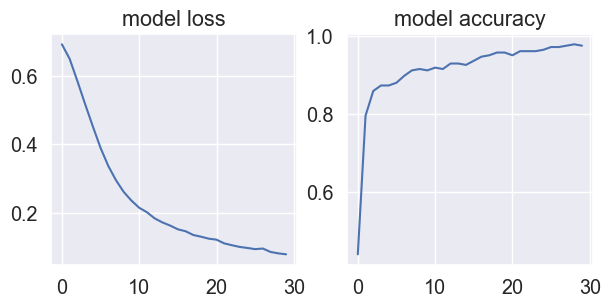

In [411]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.plot(tf_model.history["loss"])
plt.title("model loss")
plt.subplot(1, 2, 2)
plt.plot(tf_model.history["accuracy"])
plt.title("model accuracy")

In [412]:
y_pred = model.predict(X_test) > 0.5  # 컷오프 임의로 정함.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [413]:
y_test

0       True
1      False
2      False
3       True
4      False
       ...  
279    False
280     True
281    False
282    False
283    False
Name: diagnosis, Length: 284, dtype: bool

In [414]:
y_test2 = y_test.values.reshape(-1, 1)

In [415]:
y_pred.shape

(284, 1)

In [416]:
y3 = y_test2 == y_pred

In [417]:
y3.sum()

274

In [418]:
y3.shape

(284, 1)

In [419]:
y3.sum() / y3.shape[0]

0.9647887323943662

### feature 임의로 선정해보기. -> 모델2에 학습.
- radius_mean: 종양의 평균 반지름 (크기 관련).
- texture_mean: 종양의 평균 질감.
- area_mean: 종양의 평균 면적 (크기 관련).
- smoothness_mean: 종양의 평균 매끄러움 정도.
- compactness_mean: 종양의 평균 압축성.
- concavity_mean: 종양의 평균 오목성 (모양 관련).
- radius_worst: 종양의 최대 반지름 (크기 관련).
- area_worst: 종양의 최대 면적 (크기 관련).

In [420]:
features = [
    "radius_mean",
    "texture_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "radius_worst",
    "area_worst",
]

In [421]:
X_train = train[features]
X_test = test[features]

In [422]:
mms.fit(X_train)

MinMaxScaler()

In [423]:
X_train = mms.transform(X_train)

In [424]:
X_test = mms.transform(X_test)

In [425]:
model2 = tf.keras.models.Sequential()  # 모델 똑같은 종류로 새로 정의

In [426]:
model2.add(
    Dense(10, input_dim=8, activation="relu")  # 8개의 피쳐를 선택했으므로 입력차원 = 8
)
model2.add(Dense(30, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [427]:
model2.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)  # 회귀 모델은 metrics를 loss를 사용하는 것이 좋다.

In [428]:
model2.summary()  # 파라미터 개수가 많이 줄어들었음

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [429]:
tf_model2 = model2.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.6919 - loss: 0.6783 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7911 - loss: 0.6456
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.7927 - loss: 0.6182
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8211 - loss: 0.5728
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8552 - loss: 0.5417
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8440 - loss: 0.4988
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8464 - loss: 0.4587
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8630 - loss: 0.3934
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8564 - loss: 0.3755
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8993 - loss: 0.3197
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8588 - loss: 0.3269
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/ste

In [433]:
eval2 = model2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9346 - loss: 0.1616


Text(0.5, 1.0, 'model2 accuracy')

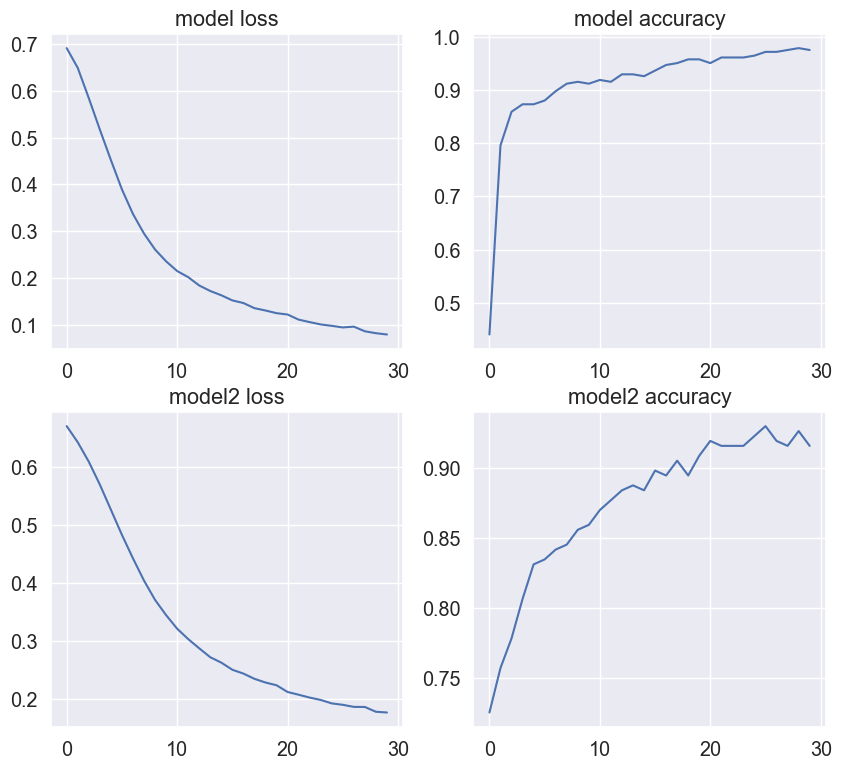

In [431]:
plt.figure(figsize=(10, 9))
plt.subplot(2, 2, 1)
plt.plot(tf_model.history["loss"])
plt.title("model loss")
plt.subplot(2, 2, 2)
plt.plot(tf_model.history["accuracy"])
plt.title("model accuracy")
plt.subplot(2, 2, 3)
plt.plot(tf_model2.history["loss"])
plt.title("model2 loss")
plt.subplot(2, 2, 4)
plt.plot(tf_model2.history["accuracy"])
plt.title("model2 accuracy")

In [449]:
eval_df = pd.DataFrame(
    [eval, eval2], index=["model", "model2"], columns=["loss", "accuracy"]
)  #
eval_df

,loss,accuracy
model,0.112848,0.964789
model2,0.162130,0.933099


Text(0.5, 1.0, 'model accuracy')

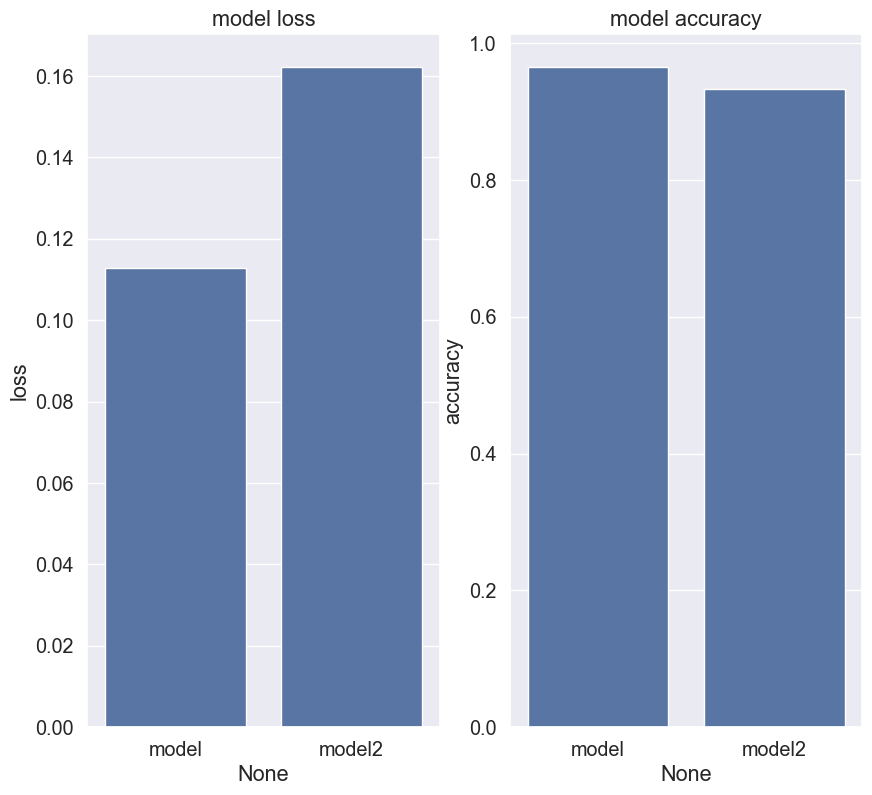

In [459]:
# 두 모델손실과 정확도 비교
plt.figure(figsize=(10, 9))
plt.subplot(1, 2, 1)
sns.barplot(x=eval_df.index, y=eval_df["loss"])
plt.title("model loss")
plt.subplot(1, 2, 2)
sns.barplot(x=eval_df.index, y=eval_df["accuracy"])
plt.title("model accuracy")

### 결과
- 30개의 feature을 넣은 모델은 정확도가 94% ~ 97%였고,(random 변수가 고정되어있지 않기 때문에 매번 바뀜) 위에서 고른 8개의 feature를 넣은 모델은 93% ~ 96%로 소폭 하락한 모습을 보이나, 거의 비슷한 성능을 보여 원본보다 훨씬 가볍지만 결과는 비슷한 모델로 구현된 것 같다.
- evaluate 값은 30개를 넣은 버전이 소폭 나은 것으로 보인다. 확실히 파라미터를 많이 들어간 모델이 성능이 더 나은 것을 보여준다.